# 5Q) K-Means

In this question we are asked to implement the SLIC (Simple Linear Iterative Clustering) algorithm, which is used for superpixel segementation. SLIC groups pixels into small, uniform regions (superpixels) that have similar color and spatial proximity. It has a basic extension of K-means algorithm. 

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb

Running SLIC in Lab space...


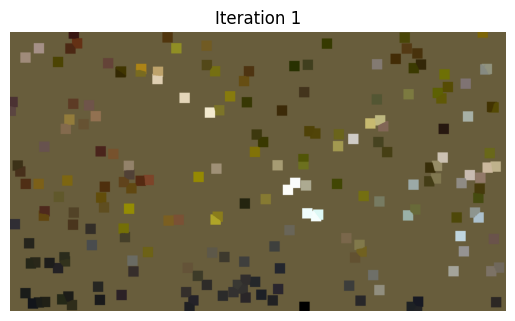

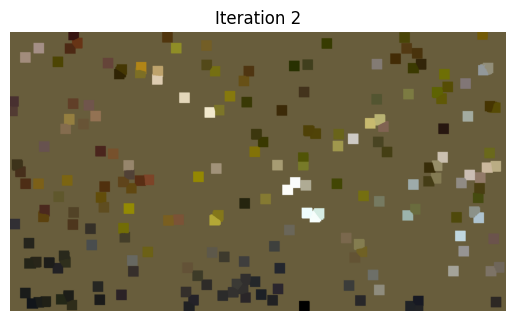

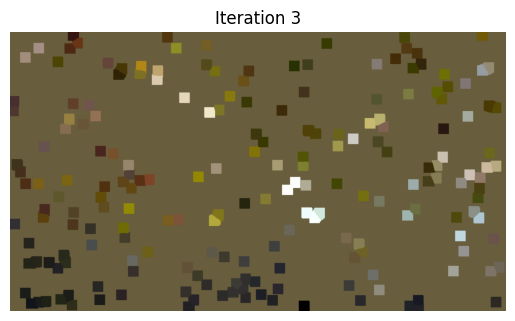

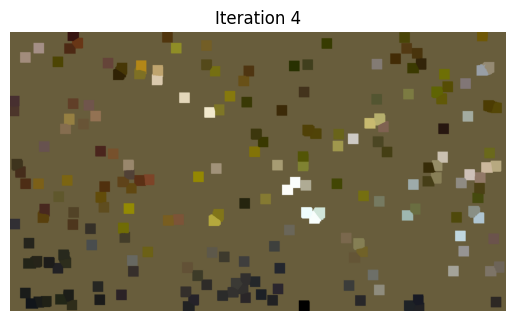

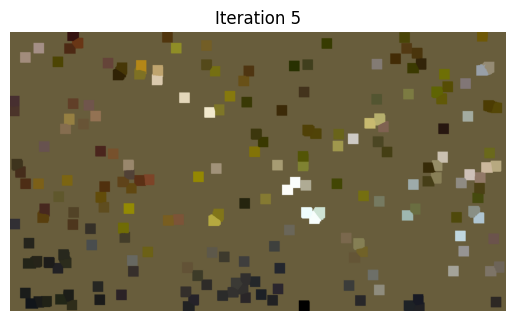

Running SLIC in RGB space...


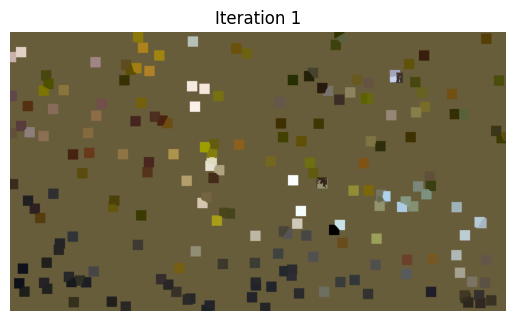

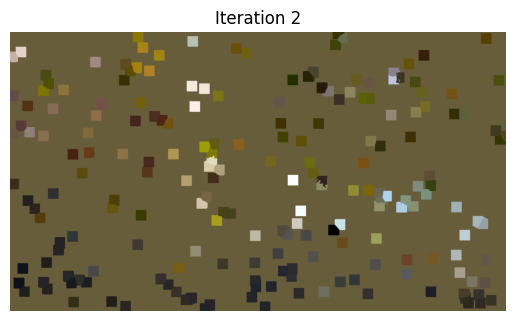

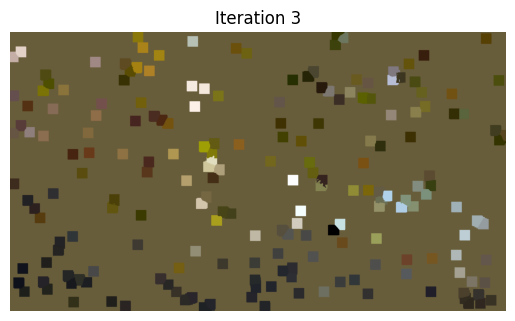

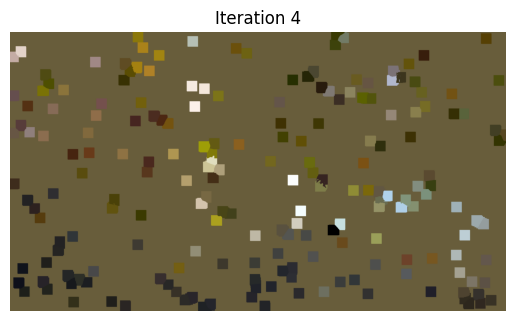

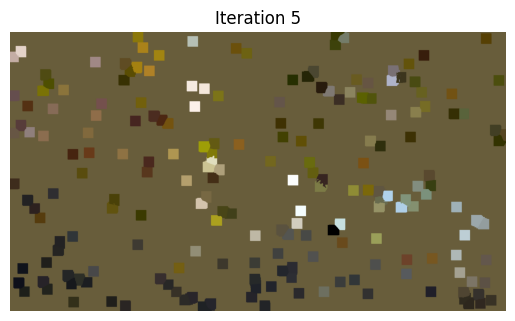

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2lab

def initialize_centers_random(image, num_clusters):
    """Initialize cluster centers randomly at any point in the image."""
    h, w, _ = image.shape
    centers = np.zeros((num_clusters, 5), dtype=np.float32)  # [L, A, B, y, x]
    
    for i in range(num_clusters):
        y, x = np.random.randint(0, h), np.random.randint(0, w)
        l, a, b = image[y, x]
        centers[i] = [l, a, b, y, x]
    
    return centers

def compute_distance(pixel, center, compactness):
    """Compute distance metric using color and spatial proximity."""
    color_dist = np.linalg.norm(pixel[:3] - center[:3])
    spatial_dist = np.linalg.norm(pixel[3:] - center[3:])
    return color_dist + compactness * spatial_dist

def slic_segmentation(image, num_clusters=100, compactness=10, max_iter=10, use_lab=True):
    h, w, _ = image.shape
    image_lab = rgb2lab(image) if use_lab else image  # Convert to Lab if needed

    centers = initialize_centers_random(image_lab, num_clusters)
    labels = -1 * np.ones((h, w), dtype=np.int32)
    distances = np.full((h, w), np.inf)

    for iteration in range(max_iter):
        for i, center in enumerate(centers):
            cy, cx = int(center[3]), int(center[4])
            y_start, y_end = max(0, cy - 20), min(h, cy + 20)
            x_start, x_end = max(0, cx - 20), min(w, cx + 20)

            for y in range(y_start, y_end):
                for x in range(x_start, x_end):
                    pixel = np.append(image_lab[y, x], [y, x])
                    dist = compute_distance(pixel, center, compactness)

                    if dist < distances[y, x]:
                        distances[y, x] = dist
                        labels[y, x] = i

        new_centers = np.zeros_like(centers, dtype=np.float32)
        counts = np.zeros((num_clusters, 1), dtype=np.float32)

        for y in range(h):
            for x in range(w):
                label = labels[y, x]
                if 0 <= label < num_clusters:
                    new_centers[label] += np.append(image_lab[y, x], [y, x])
                    counts[label] += 1

        for i in range(num_clusters):
            if counts[i] > 0:
                new_centers[i] /= counts[i]

        centers = new_centers

        # Display per-iteration progress
        segmented_image = label2rgb(labels, image, kind='avg')
        plt.imshow(segmented_image)
        plt.title(f"Iteration {iteration+1}")
        plt.axis('off')
        plt.show()

    return labels

# Load image
image = cv2.imread("./SMAI A1/frame_0000.jpg")
if image is None:
    raise ValueError("Error: Image not found. Check the file path.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Try different settings
print("Running SLIC in Lab space...")
labels_lab = slic_segmentation(image, num_clusters=200, compactness=20, max_iter=5, use_lab=True)

print("Running SLIC in RGB space...")
labels_rgb = slic_segmentation(image, num_clusters=200, compactness=20, max_iter=5, use_lab=False)

